# xFLS master catalogue
## Checks and diagnostics

These revealed a number of issues to be corrected. There was a unit issue with the BASS Legacy Survey magnitudes and fluxes which needs to be corrected across all the fields. The UHS magnitudes are Vega and needed to be corrected.

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
44f1ae0 (Thu Nov 30 18:27:54 2017 +0000)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3

from herschelhelp_internal.masterlist import (nb_compare_mags, nb_ccplots, nb_histograms, find_last_ml_suffix, 
                                              quick_checks)

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "20171016"

master_catalogue_filename = "master_catalogue_xfls_{}.fits".format(SUFFIX)
master_catalogue = Table.read("{}/{}".format(OUT_DIR, master_catalogue_filename))

print("Diagnostics done using: {}".format(master_catalogue_filename))

Diagnostics done using: master_catalogue_xfls_20171201.fits


## 0 - Quick checks

In [4]:
quick_checks(master_catalogue).show_in_notebook()

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(152, False) will return an array of dtype('bool')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(152, 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


Table shows only problematic columns.


## I - Summary of wavelength domains

In [5]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


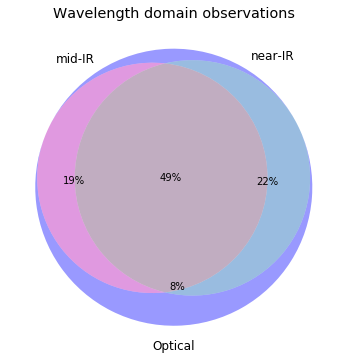

In [6]:
venn3(
    [
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 6),
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 5),
        np.sum(flag_obs == 3),
        np.sum(flag_obs == 7)
    ],
    set_labels=( 'mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:57: UserWarning: Circle B has zero area
  warnings.warn("Circle B has zero area")


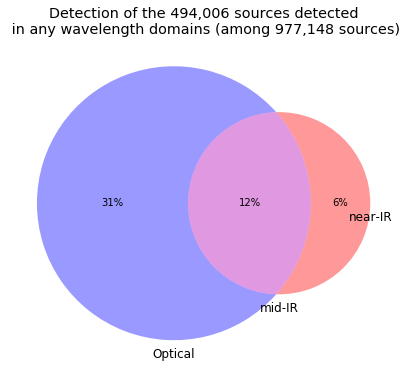

In [7]:
venn3(
    [
        np.sum(flag_det[flag_obs == 7] == 4),
        np.sum(flag_det[flag_obs == 7] == 2),
        np.sum(flag_det[flag_obs == 7] == 6),
        np.sum(flag_det[flag_obs == 7] == 1),
        np.sum(flag_det[flag_obs == 7] == 5),
        np.sum(flag_det[flag_obs == 7] == 3),
        np.sum(flag_det[flag_obs == 7] == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [8]:
u_bands = ["WFC u"]
g_bands = ["WFC g", "BASS g", "GPC1 g"]
r_bands = ["WFC r", "BASS r", "GPC1 r", "KPNO r"]
i_bands = ["WFC i",           "GPC1 i"]
z_bands = ["WFC z",           "GPC1 z"]
y_bands = [         "BASS z", "GPC1 y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

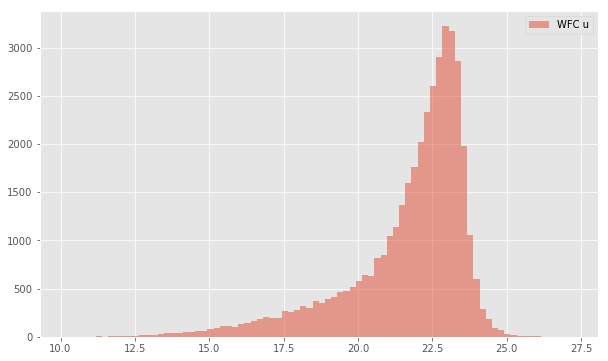

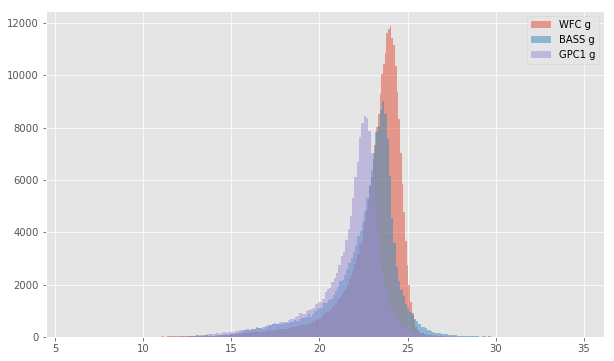

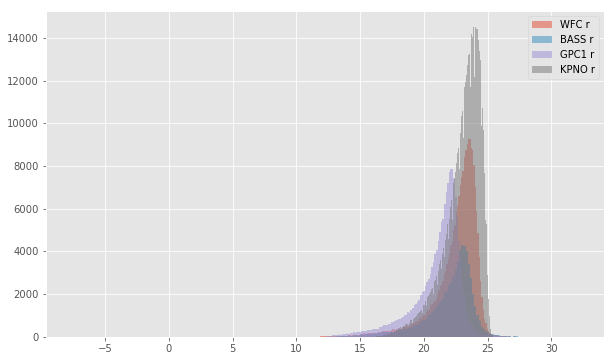

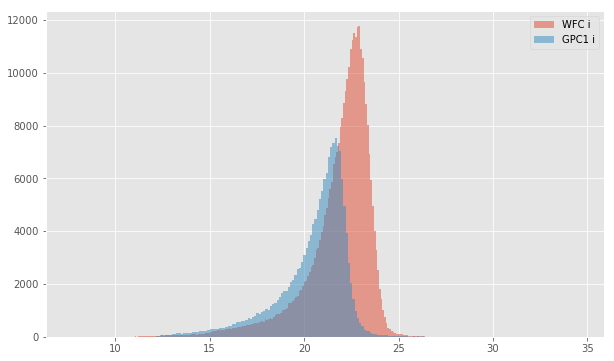

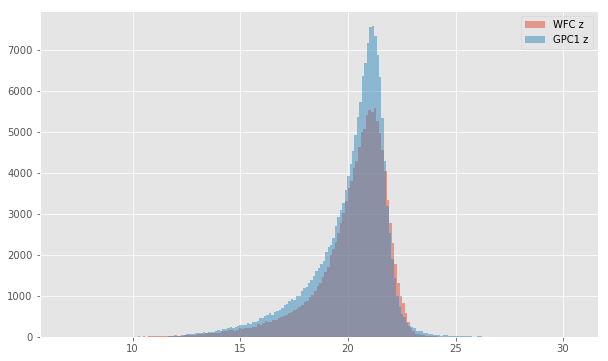

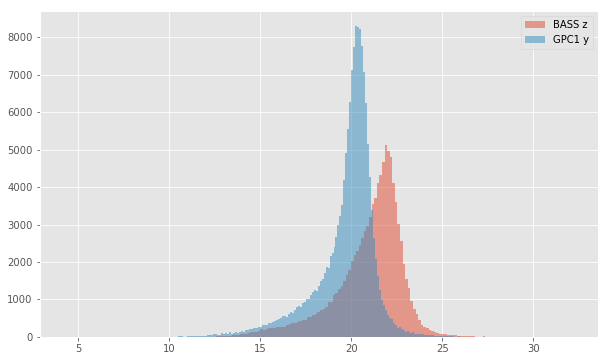

In [9]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

BASS g (aperture) - WFC g (aperture):
- Median: 0.05
- Median Absolute Deviation: 0.13
- 1% percentile: -0.6256225967407226
- 99% percentile: 3.0758930015563952


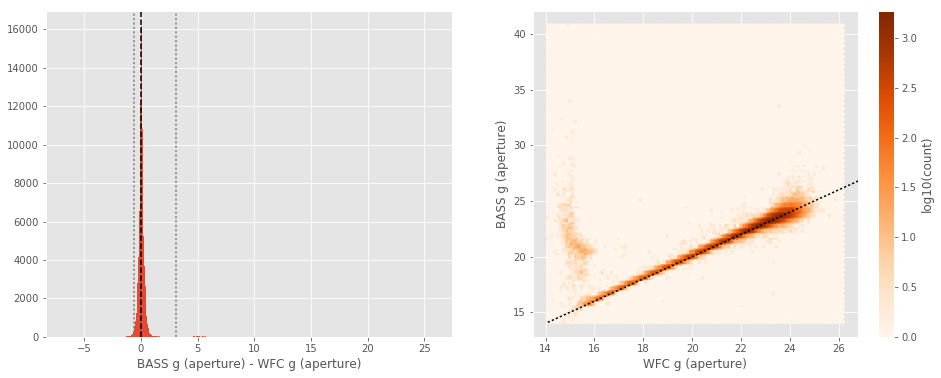

BASS g (total) - WFC g (total):
- Median: -0.02
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0549715042114258
- 99% percentile: 1.0528565597534065


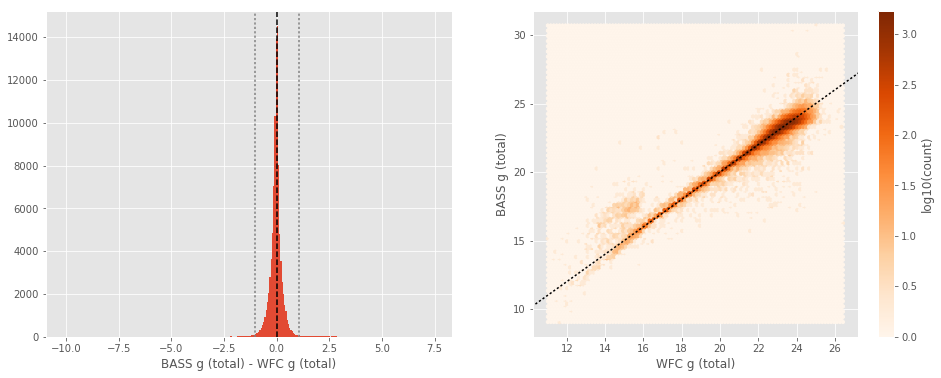

GPC1 g (aperture) - WFC g (aperture):
- Median: -0.03
- Median Absolute Deviation: 0.22
- 1% percentile: -1.936893730163574
- 99% percentile: 2.239777622222912


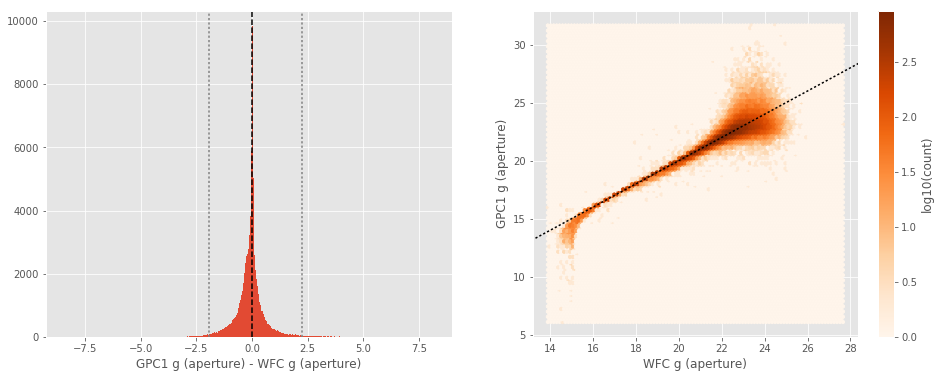

GPC1 g (total) - WFC g (total):
- Median: 0.03
- Median Absolute Deviation: 0.19
- 1% percentile: -2.26982141494751
- 99% percentile: 1.678289241790777


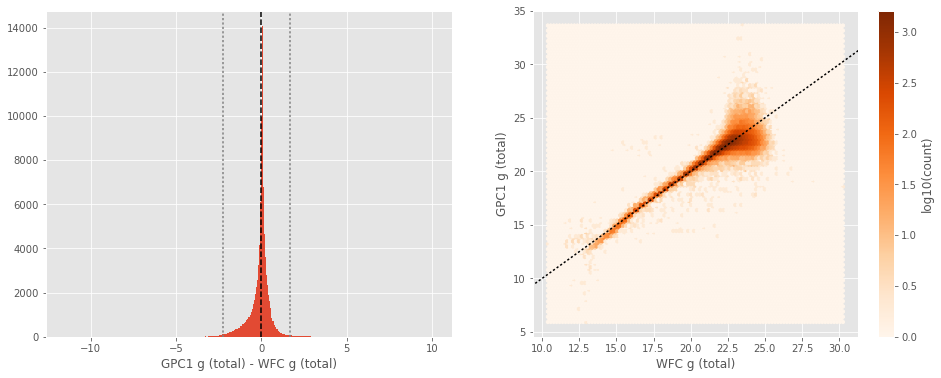

GPC1 g (aperture) - BASS g (aperture):
- Median: -0.11
- Median Absolute Deviation: 0.22
- 1% percentile: -5.588285446166992
- 99% percentile: 2.078149032592774


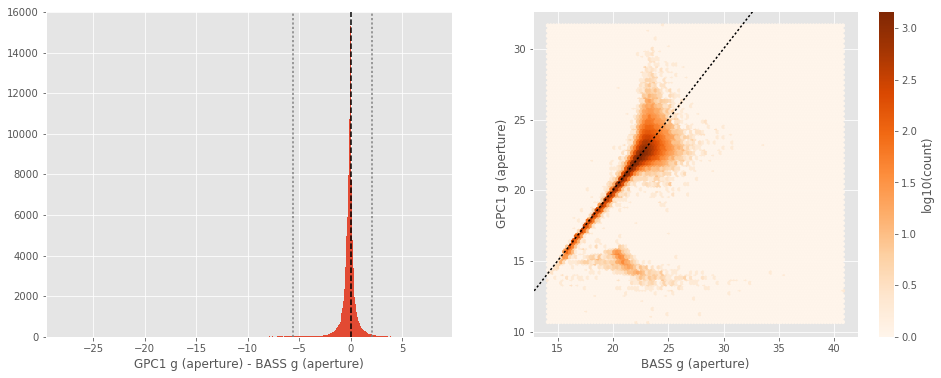

GPC1 g (total) - BASS g (total):
- Median: 0.03
- Median Absolute Deviation: 0.18
- 1% percentile: -2.754972381591797
- 99% percentile: 1.8167191314697235


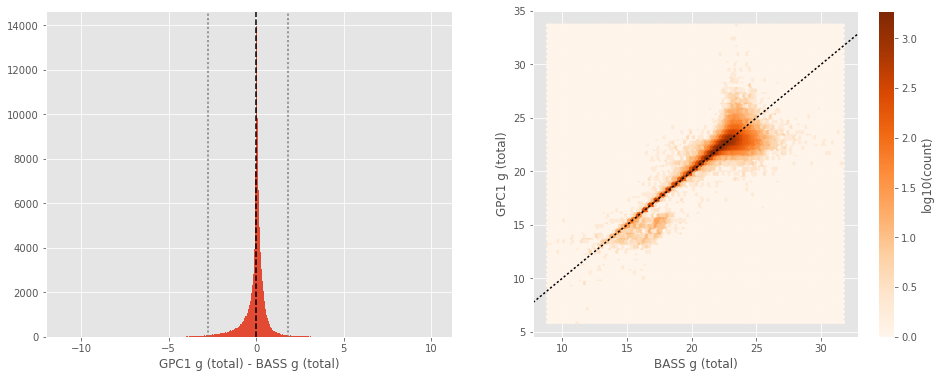

BASS r (aperture) - WFC r (aperture):
- Median: -0.13
- Median Absolute Deviation: 0.15
- 1% percentile: -1.005444869995117
- 99% percentile: 4.584682769775396


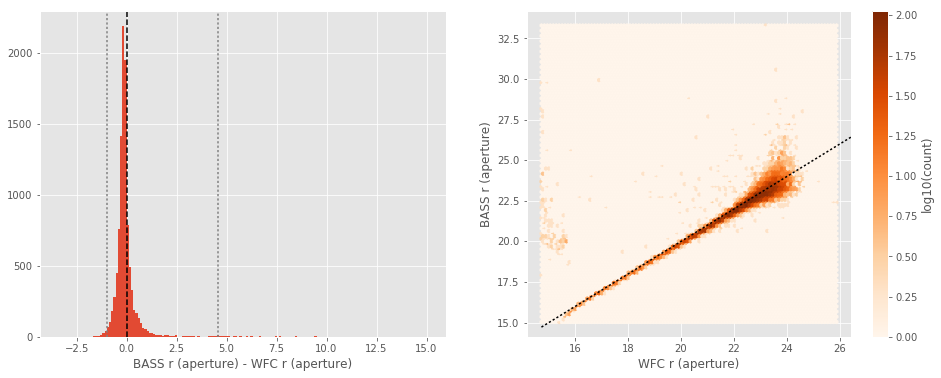

BASS r (total) - WFC r (total):
- Median: -0.13
- Median Absolute Deviation: 0.16
- 1% percentile: -1.8431853485107421
- 99% percentile: 1.4611610031127977


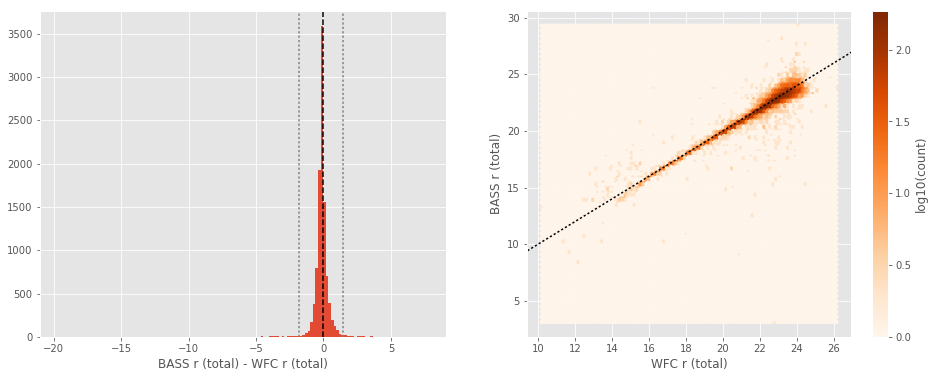

GPC1 r (aperture) - WFC r (aperture):
- Median: -0.03
- Median Absolute Deviation: 0.14
- 1% percentile: -1.2797001647949218
- 99% percentile: 1.3428354644775493


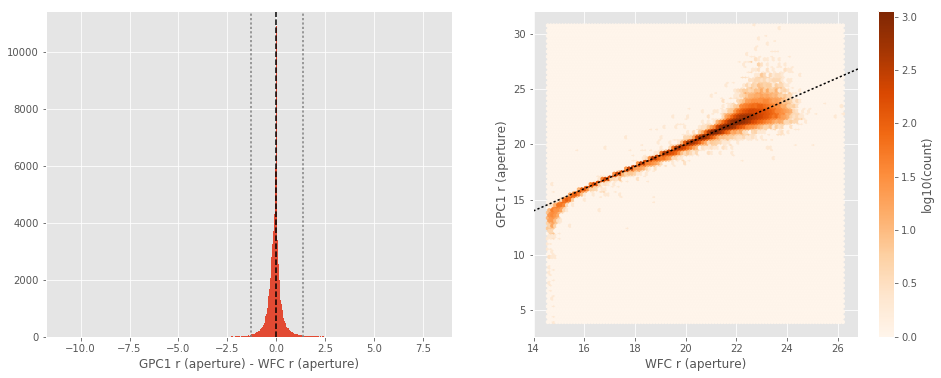

GPC1 r (total) - WFC r (total):
- Median: 0.05
- Median Absolute Deviation: 0.12
- 1% percentile: -1.5688879203796386
- 99% percentile: 0.9246087837219206


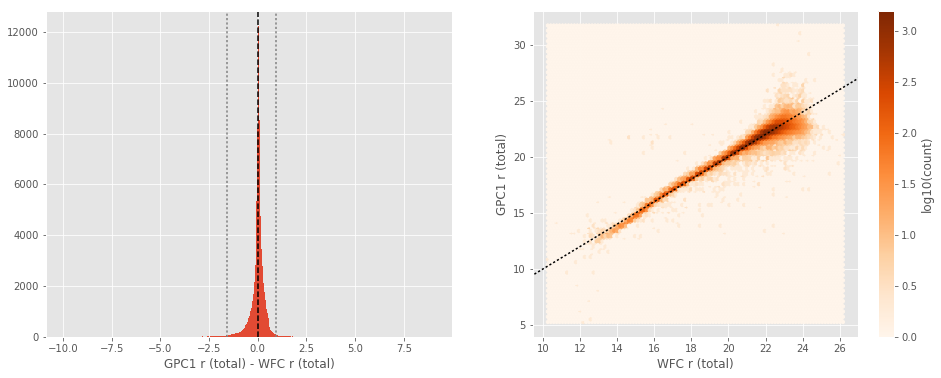

KPNO r (aperture) - WFC r (aperture):
- Median: -0.17
- Median Absolute Deviation: 0.14
- 1% percentile: -0.8770008087158203
- 99% percentile: 0.5059786605835066


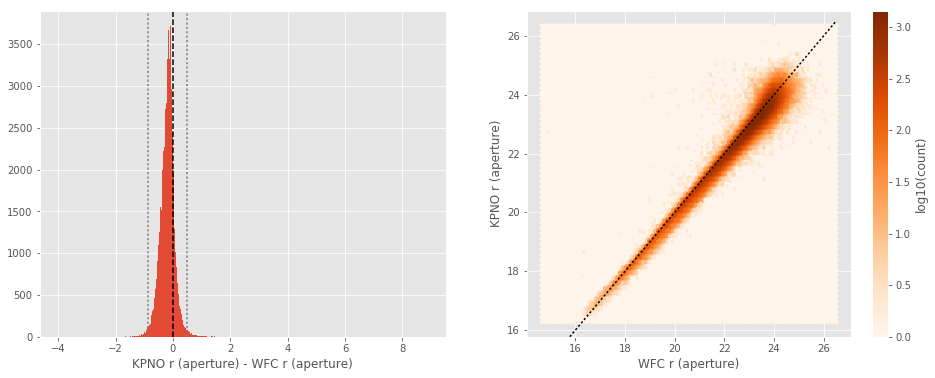

KPNO r (total) - WFC r (total):
- Median: -0.41
- Median Absolute Deviation: 0.19
- 1% percentile: -2.126770496368408
- 99% percentile: 0.5179996490478516


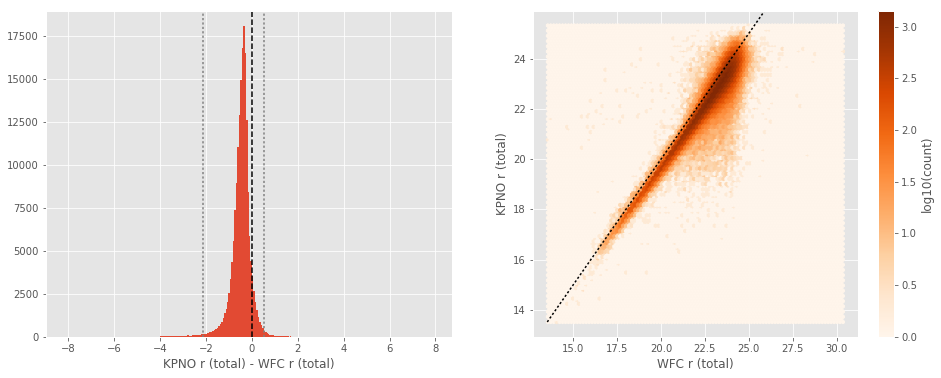

GPC1 r (aperture) - BASS r (aperture):
- Median: 0.10
- Median Absolute Deviation: 0.13
- 1% percentile: -5.567615804672242
- 99% percentile: 1.5617235946655268


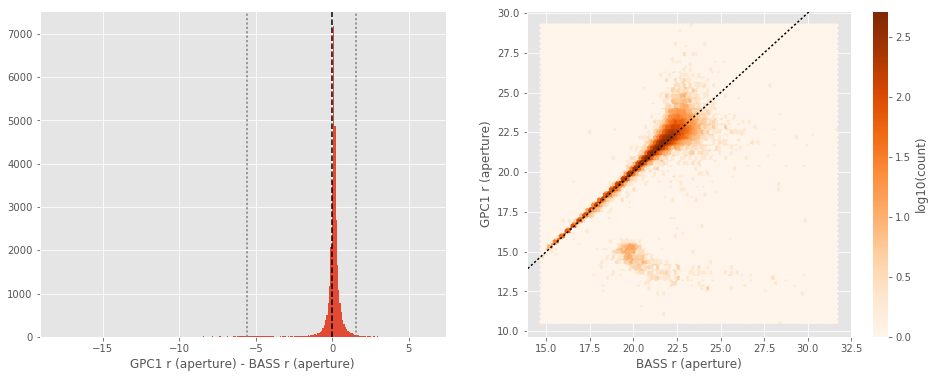

GPC1 r (total) - BASS r (total):
- Median: 0.21
- Median Absolute Deviation: 0.13
- 1% percentile: -1.4610954570770263
- 99% percentile: 1.5784747123718255


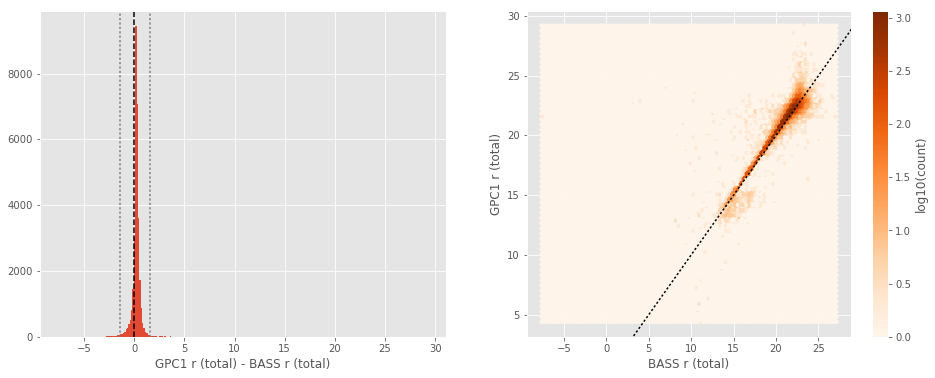

KPNO r (aperture) - BASS r (aperture):
- Median: -0.04
- Median Absolute Deviation: 0.18
- 1% percentile: -2.1393571090698242
- 99% percentile: 0.8618970489501949


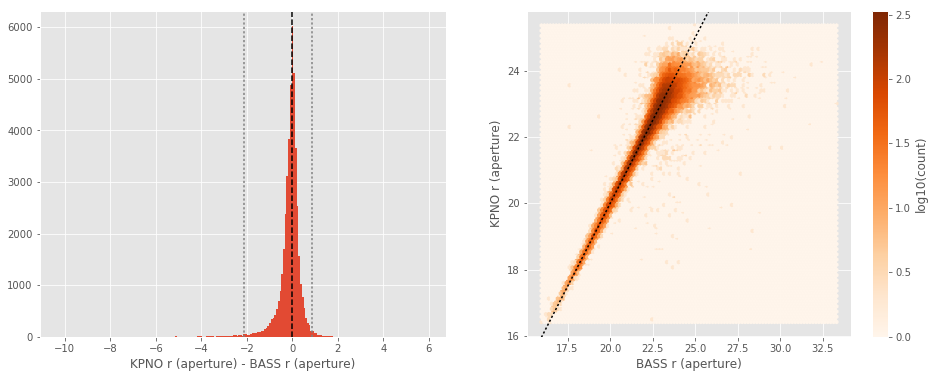

KPNO r (total) - BASS r (total):
- Median: -0.27
- Median Absolute Deviation: 0.19
- 1% percentile: -2.146008892059326
- 99% percentile: 0.9464354515075717


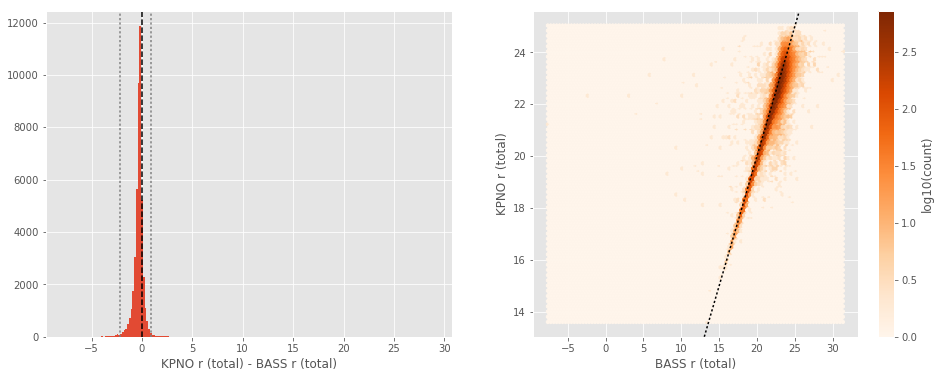

KPNO r (aperture) - GPC1 r (aperture):
- Median: -0.12
- Median Absolute Deviation: 0.20
- 1% percentile: -1.8193340682983399
- 99% percentile: 0.821635704040526


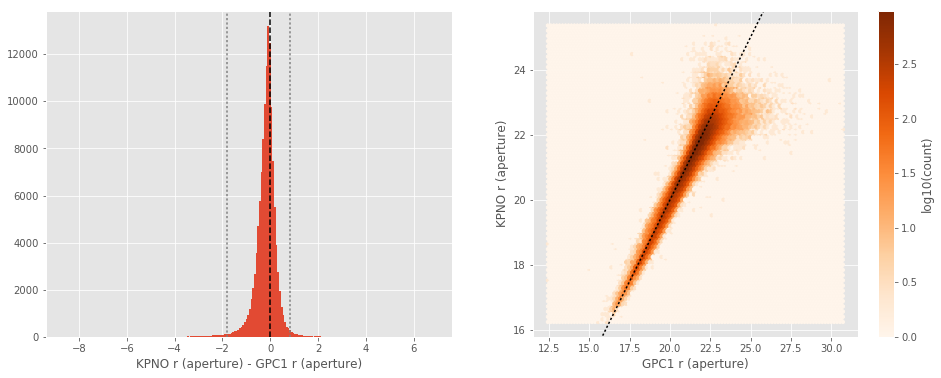

KPNO r (total) - GPC1 r (total):
- Median: -0.47
- Median Absolute Deviation: 0.18
- 1% percentile: -1.8546954727172853
- 99% percentile: 0.7358176422119134


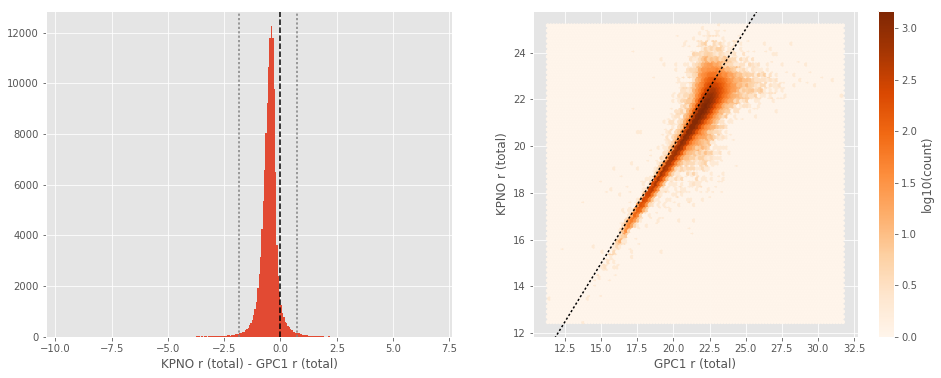

GPC1 i (aperture) - WFC i (aperture):
- Median: 0.04
- Median Absolute Deviation: 0.11
- 1% percentile: -0.952352294921875
- 99% percentile: 0.8918610382079997


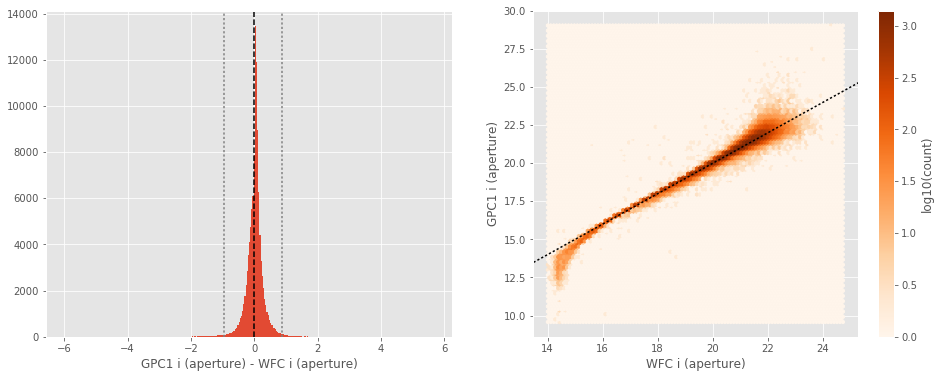

GPC1 i (total) - WFC i (total):
- Median: 0.11
- Median Absolute Deviation: 0.10
- 1% percentile: -0.8853607177734375
- 99% percentile: 0.8438045501708963


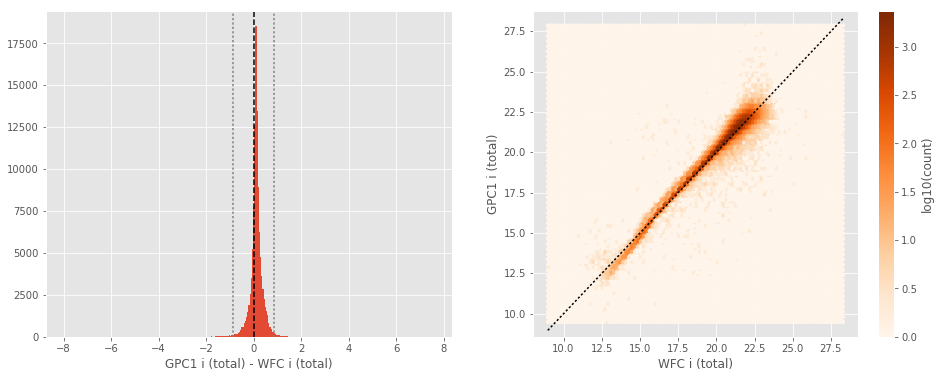

GPC1 z (aperture) - WFC z (aperture):
- Median: 0.06
- Median Absolute Deviation: 0.13
- 1% percentile: -0.8765241622924804
- 99% percentile: 1.23230981826782


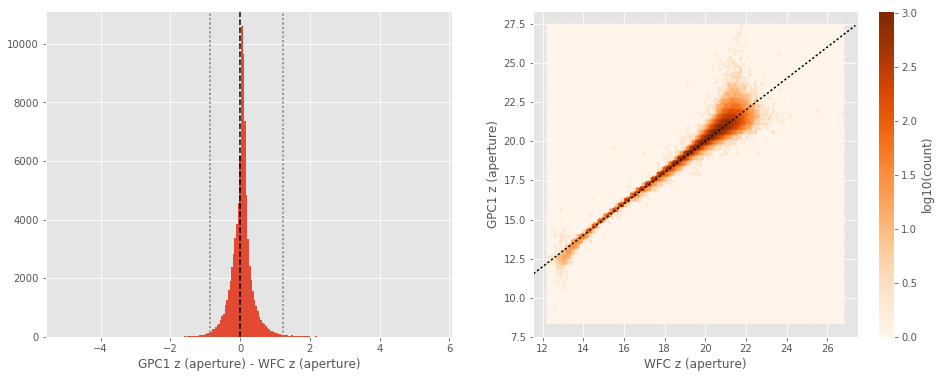

GPC1 z (total) - WFC z (total):
- Median: 0.10
- Median Absolute Deviation: 0.17
- 1% percentile: -0.9696512603759765
- 99% percentile: 1.490121402740476


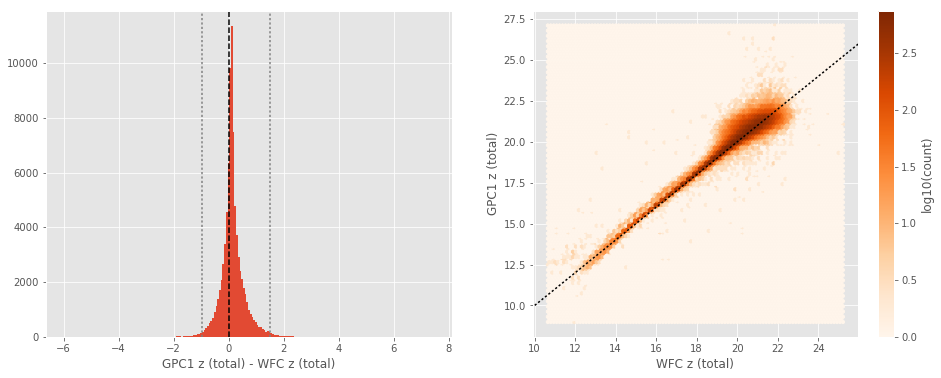

GPC1 y (aperture) - BASS z (aperture):
- Median: -0.10
- Median Absolute Deviation: 0.22
- 1% percentile: -3.4303236579895016
- 99% percentile: 1.9012526702880828


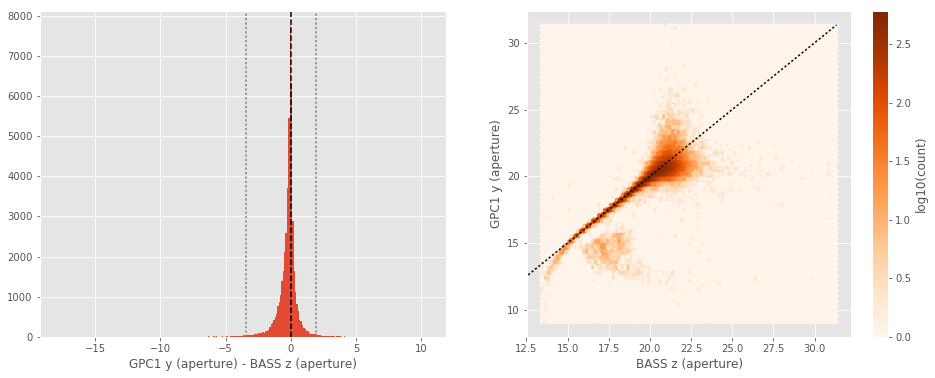

GPC1 y (total) - BASS z (total):
- Median: 0.08
- Median Absolute Deviation: 0.22
- 1% percentile: -2.127430629730225
- 99% percentile: 1.8989069938659666


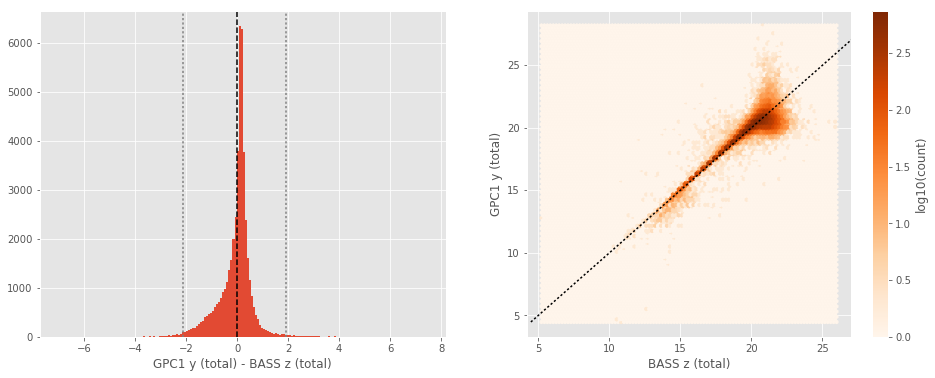

In [10]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [11]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [12]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_xFLS.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

WFC u (aperture) - SDSS u (fiberMag):
- Median: -0.33
- Median Absolute Deviation: 0.13
- 1% percentile: -1.6017975616455078
- 99% percentile: 0.6325454711914066


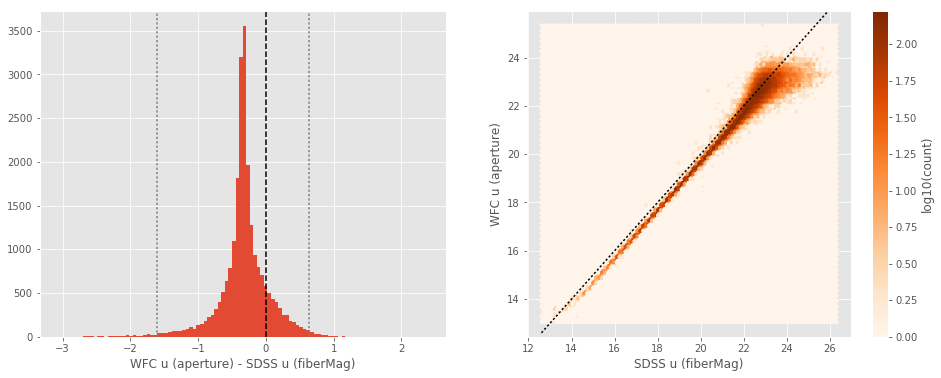

WFC u (total) - SDSS u (petroMag):
- Median: -0.33
- Median Absolute Deviation: 0.13
- 1% percentile: -1.6017975616455078
- 99% percentile: 0.6325454711914066


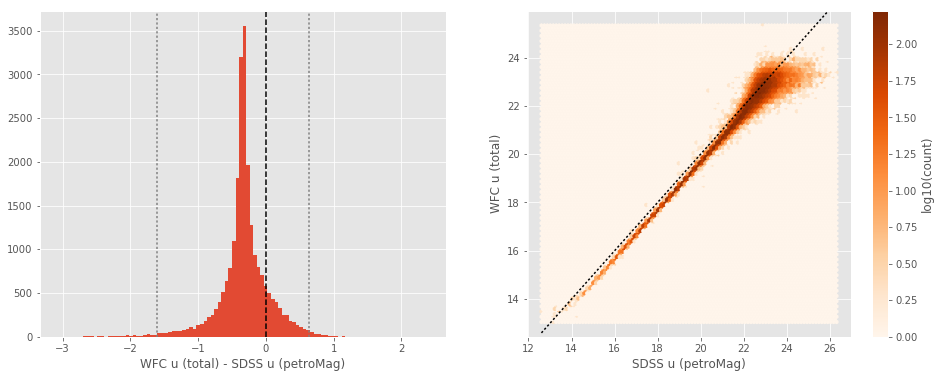

WFC g (aperture) - SDSS g (fiberMag):
- Median: -0.45
- Median Absolute Deviation: 0.10
- 1% percentile: -1.1772414016723634
- 99% percentile: 0.4478158187866218


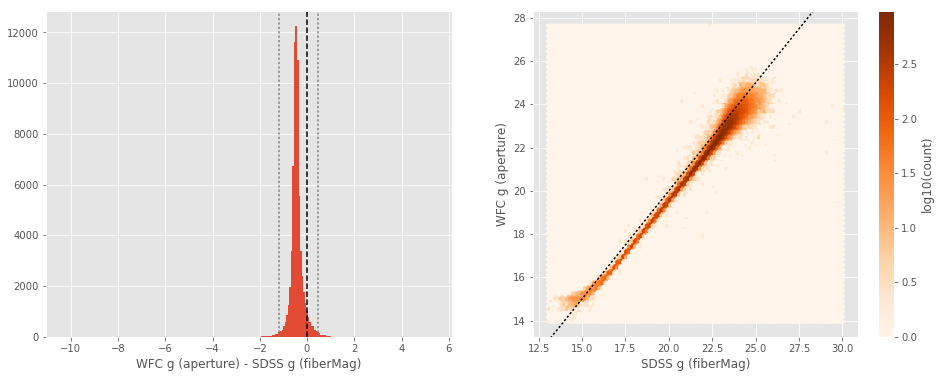

WFC g (total) - SDSS g (petroMag):
- Median: -0.45
- Median Absolute Deviation: 0.10
- 1% percentile: -1.1772414016723634
- 99% percentile: 0.4478158187866218


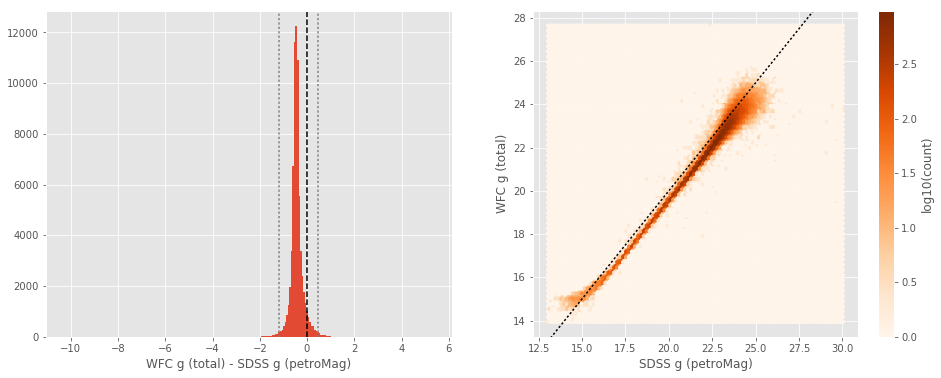

BASS g (aperture) - SDSS g (fiberMag):
- Median: -0.38
- Median Absolute Deviation: 0.14
- 1% percentile: -1.101987075805664
- 99% percentile: 4.830027141571065


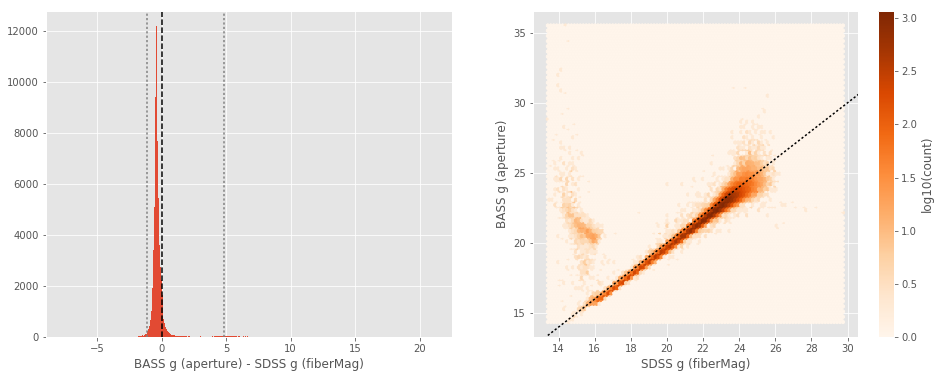

BASS g (total) - SDSS g (petroMag):
- Median: -0.38
- Median Absolute Deviation: 0.14
- 1% percentile: -1.101987075805664
- 99% percentile: 4.830027141571065


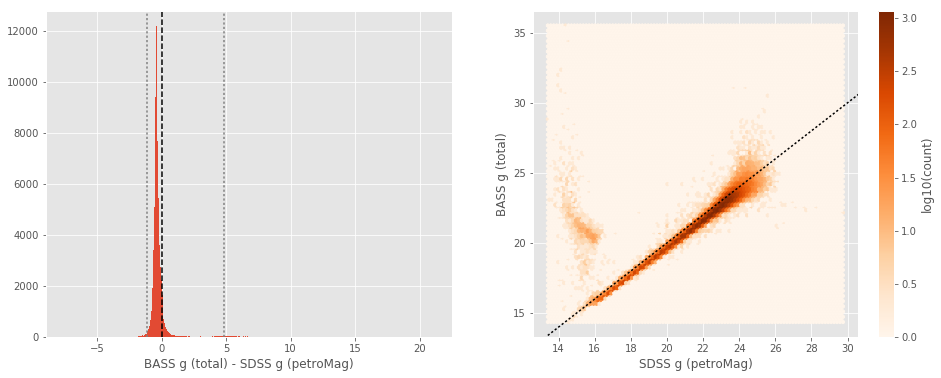

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.47
- Median Absolute Deviation: 0.20
- 1% percentile: -2.4040427207946777
- 99% percentile: 1.6819067001342773


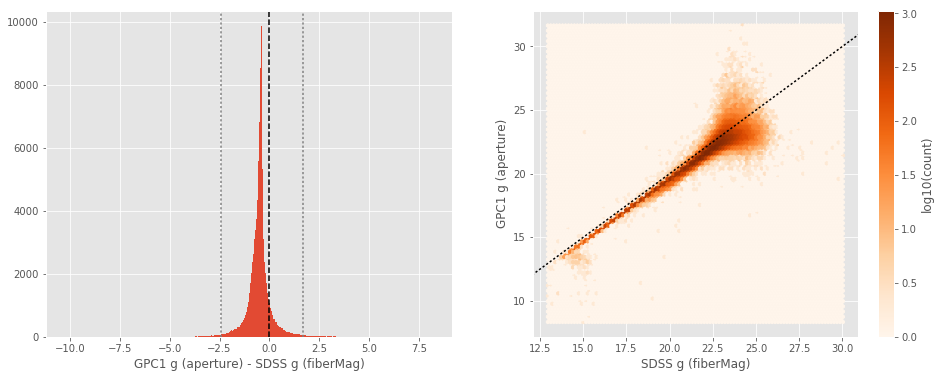

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.47
- Median Absolute Deviation: 0.20
- 1% percentile: -2.4040427207946777
- 99% percentile: 1.6819067001342773


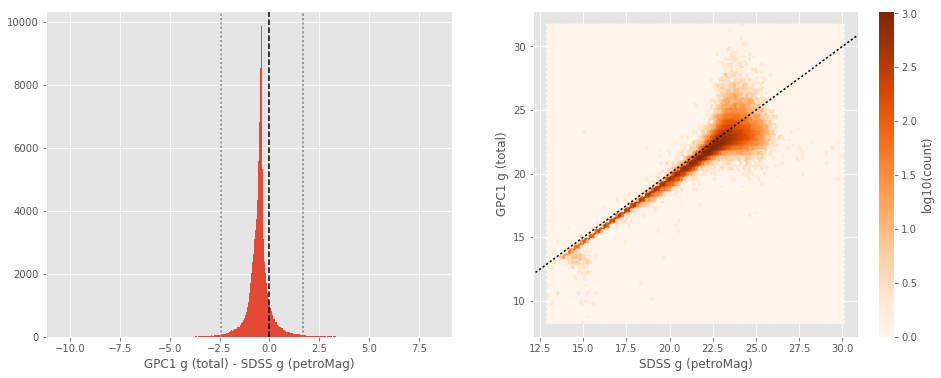

WFC r (aperture) - SDSS r (fiberMag):
- Median: -0.34
- Median Absolute Deviation: 0.06
- 1% percentile: -0.9351469993591308
- 99% percentile: 0.3601674079895015


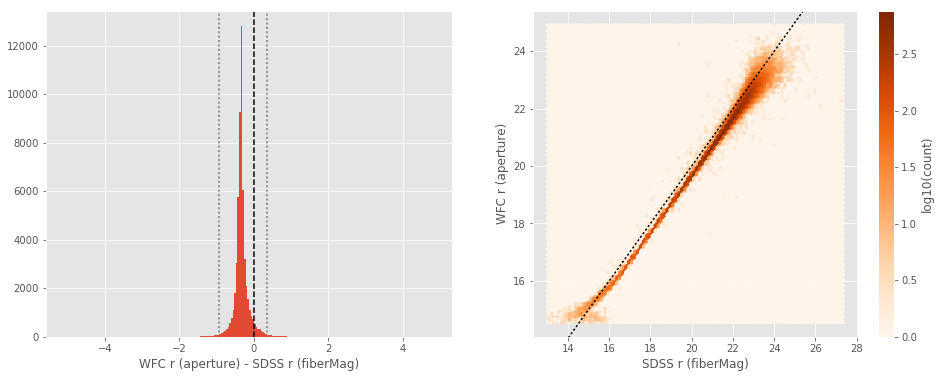

WFC r (total) - SDSS r (petroMag):
- Median: -0.34
- Median Absolute Deviation: 0.06
- 1% percentile: -0.9351469993591308
- 99% percentile: 0.3601674079895015


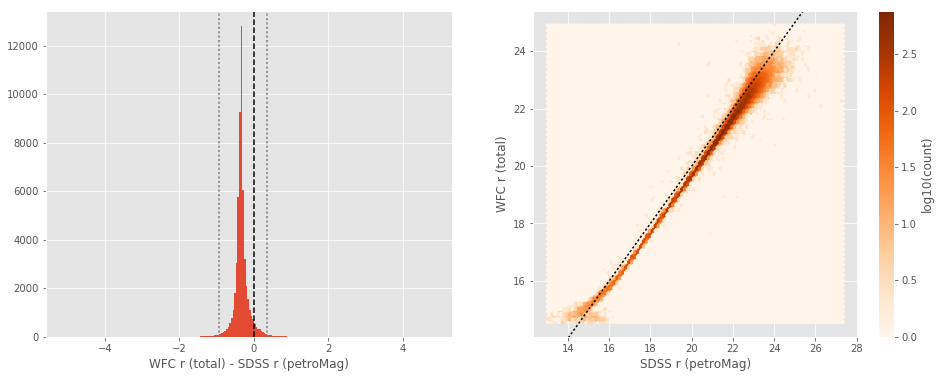

BASS r (aperture) - SDSS r (fiberMag):
- Median: -0.46
- Median Absolute Deviation: 0.11
- 1% percentile: -1.1453510665893556
- 99% percentile: 5.127978057861326


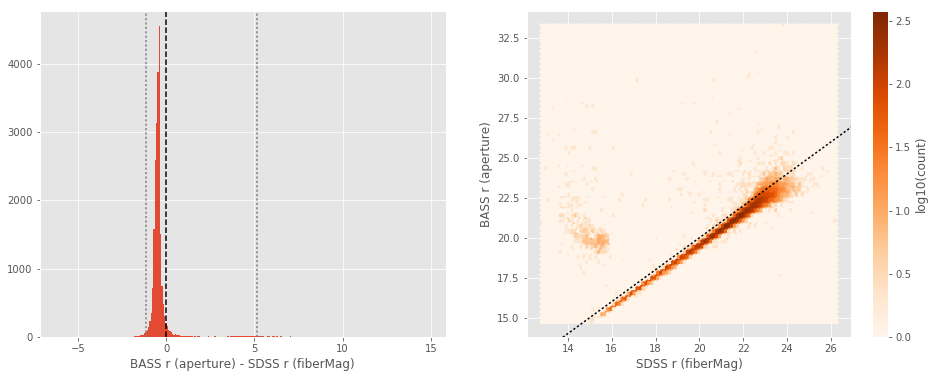

BASS r (total) - SDSS r (petroMag):
- Median: -0.46
- Median Absolute Deviation: 0.11
- 1% percentile: -1.1453510665893556
- 99% percentile: 5.127978057861326


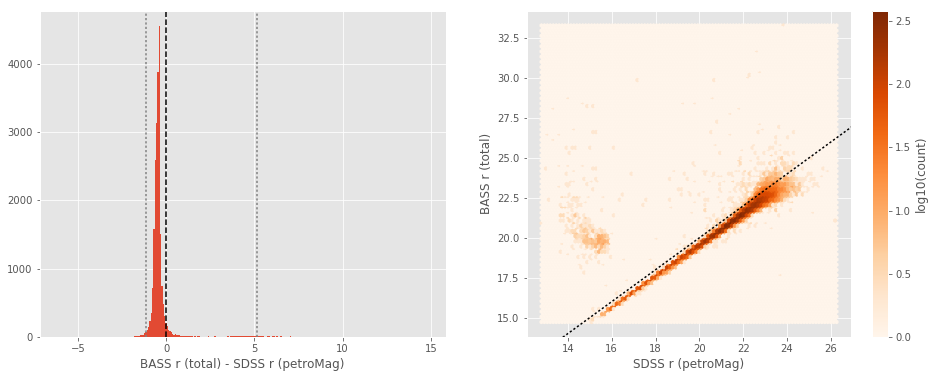

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.34
- Median Absolute Deviation: 0.12
- 1% percentile: -1.4154183197021484
- 99% percentile: 0.8237089157104492


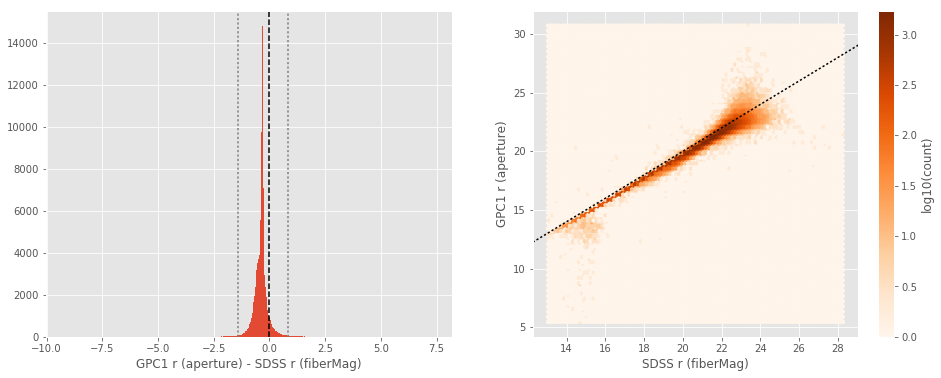

GPC1 r (total) - SDSS r (petroMag):
- Median: -0.34
- Median Absolute Deviation: 0.12
- 1% percentile: -1.4154183197021484
- 99% percentile: 0.8237089157104492


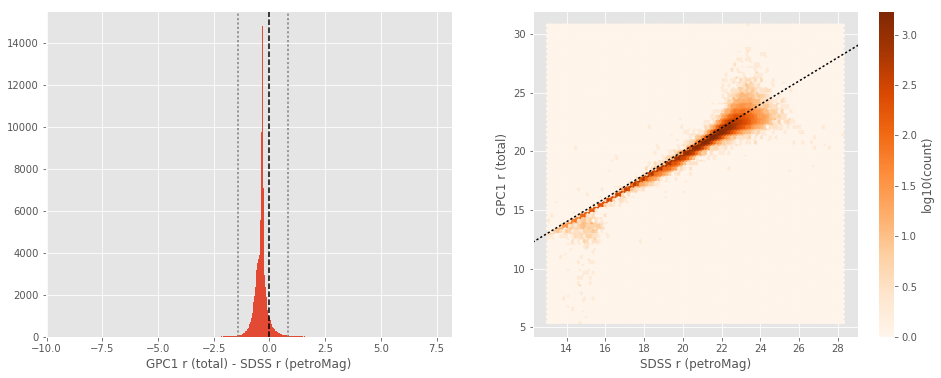

KPNO r (aperture) - SDSS r (fiberMag):
- Median: -0.50
- Median Absolute Deviation: 0.13
- 1% percentile: -1.3614568710327148
- 99% percentile: 0.02729091644287046


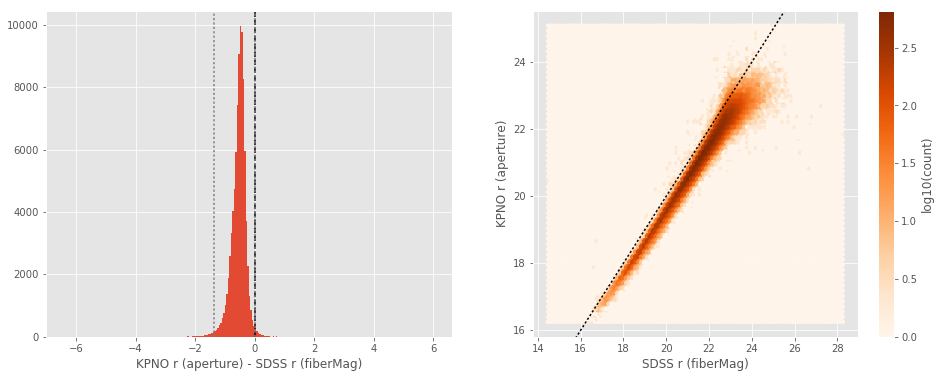

KPNO r (total) - SDSS r (petroMag):
- Median: -0.50
- Median Absolute Deviation: 0.13
- 1% percentile: -1.3614568710327148
- 99% percentile: 0.02729091644287046


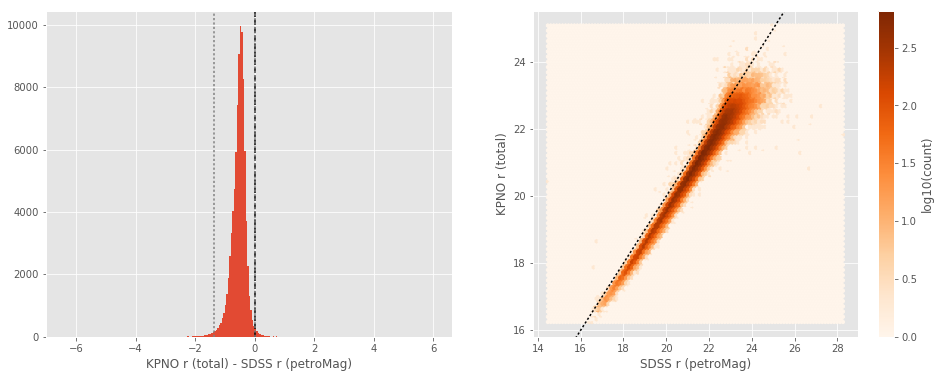

WFC i (aperture) - SDSS i (fiberMag):
- Median: -0.40
- Median Absolute Deviation: 0.07
- 1% percentile: -0.9382619476318359
- 99% percentile: 0.3755919170379611


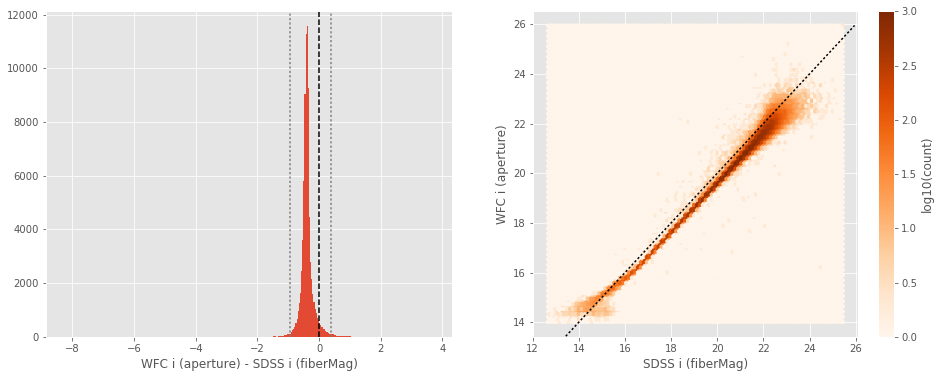

WFC i (total) - SDSS i (petroMag):
- Median: -0.40
- Median Absolute Deviation: 0.07
- 1% percentile: -0.9382619476318359
- 99% percentile: 0.3755919170379611


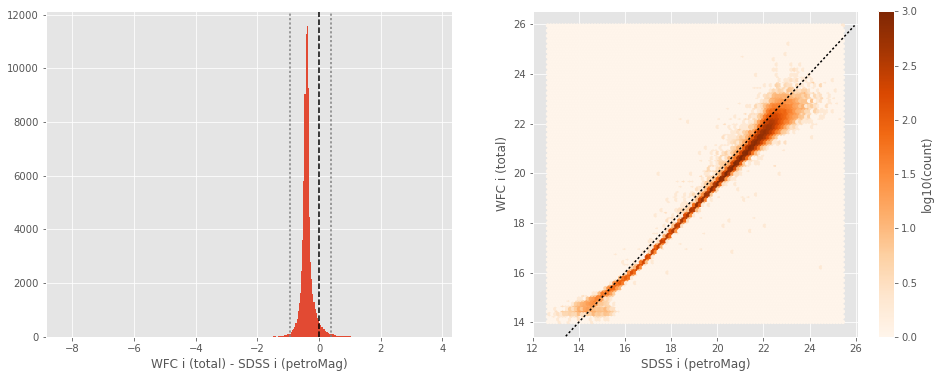

GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.34
- Median Absolute Deviation: 0.09
- 1% percentile: -0.9665631103515625
- 99% percentile: 0.4199513244628907


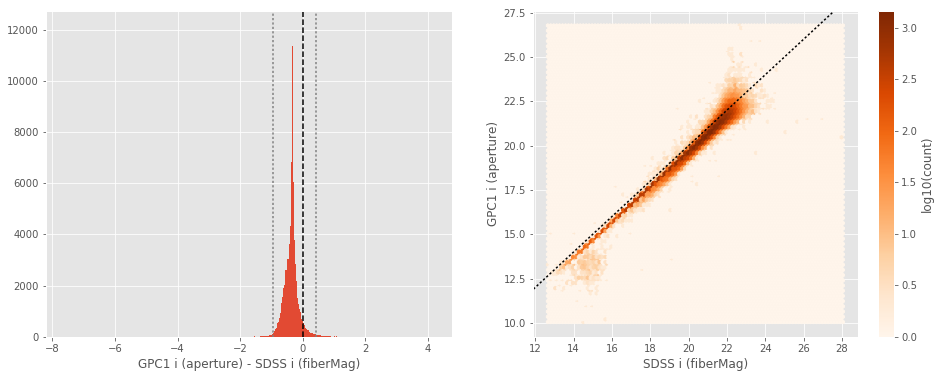

GPC1 i (total) - SDSS i (petroMag):
- Median: -0.34
- Median Absolute Deviation: 0.09
- 1% percentile: -0.9665631103515625
- 99% percentile: 0.4199513244628907


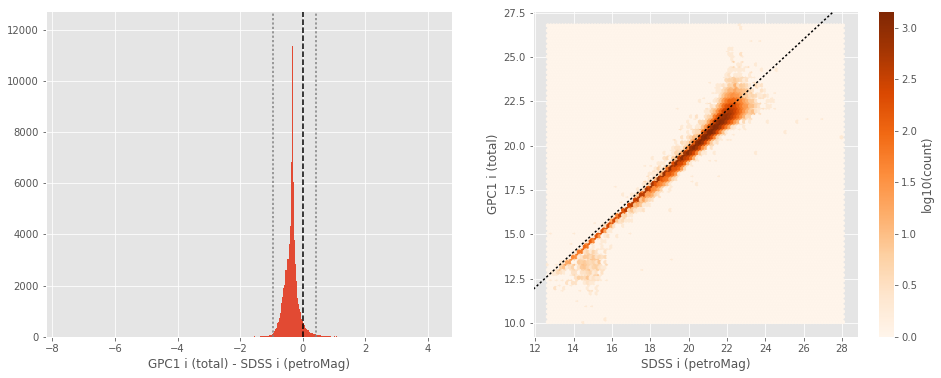

WFC z (aperture) - SDSS z (fiberMag):
- Median: -0.35
- Median Absolute Deviation: 0.10
- 1% percentile: -1.2951622009277344
- 99% percentile: 0.58636474609375


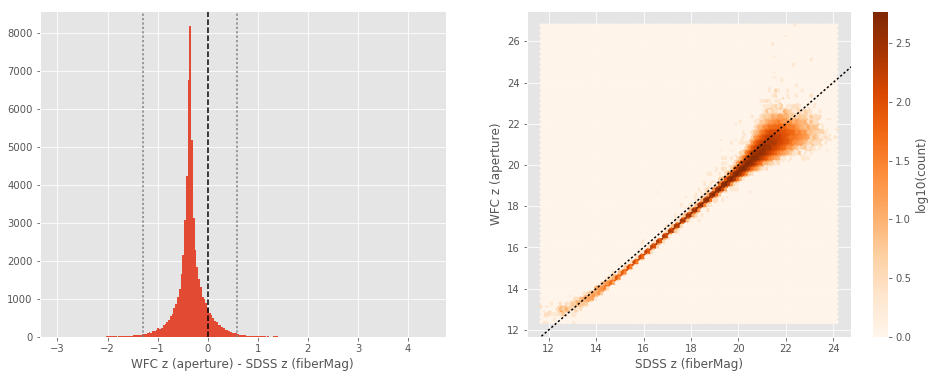

WFC z (total) - SDSS z (petroMag):
- Median: -0.35
- Median Absolute Deviation: 0.10
- 1% percentile: -1.2951622009277344
- 99% percentile: 0.58636474609375


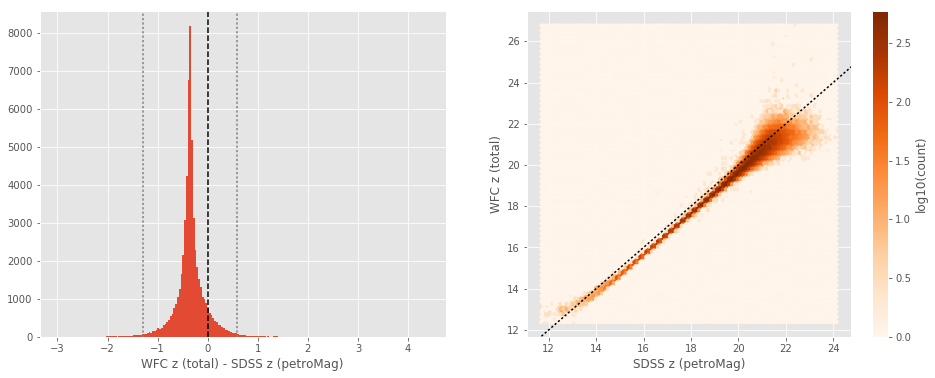

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.29
- Median Absolute Deviation: 0.13
- 1% percentile: -1.3401688385009765
- 99% percentile: 0.9634982299804702


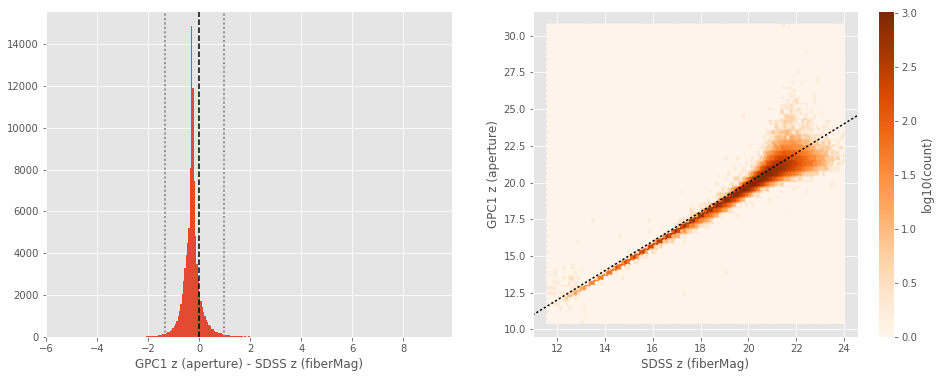

GPC1 z (total) - SDSS z (petroMag):
- Median: -0.29
- Median Absolute Deviation: 0.13
- 1% percentile: -1.3401688385009765
- 99% percentile: 0.9634982299804702


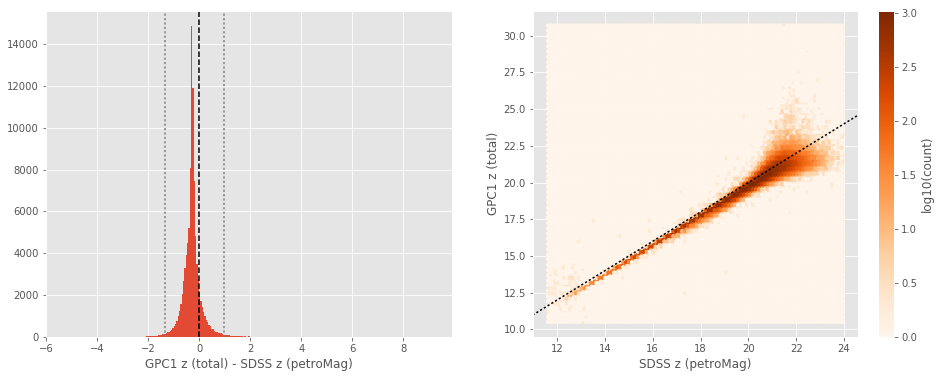

In [13]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap = sdss["fiberMag_{}".format(band[-1])]
        master_cat_mag_ap = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss["petroMag_{}".format(band[-1])]
        master_cat_mag_tot = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, UKIDSS uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [14]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [15]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_xFLS.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

UHS J (total) - 2MASS J:
- Median: 0.03
- Median Absolute Deviation: 0.04
- 1% percentile: -0.7433211570646104
- 99% percentile: 0.3831149141023818


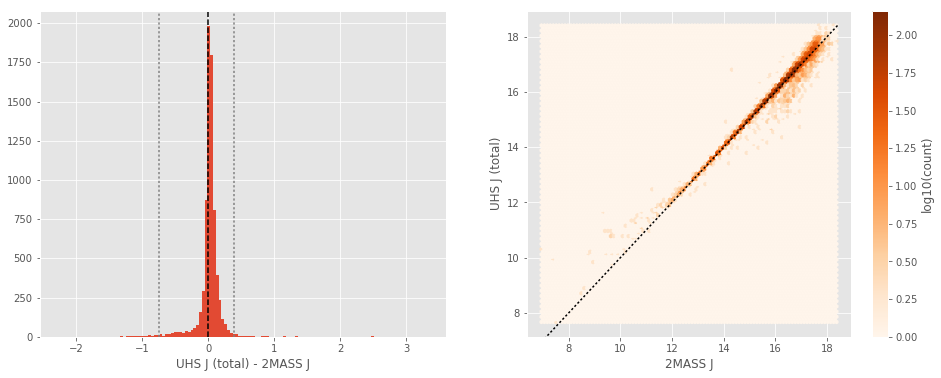

In [16]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_wfcam_j'][ml_twomass_idx],
                labels=("2MASS J", "UHS J (total)"))

The graph above originally revealed that UHS needed conversion to AB.

## Keeping only sources with good signal to noise ratio

From here, we are only comparing sources with a signal to noise ratio above 3, i.e. roughly we a magnitude error below 0.3.

*To make it easier, we are setting to NaN in the catalogue the magnitudes associated with an error above 0.3 so we can't use these magnitudes after the next cell.*

In [17]:
for error_column in [_ for _ in master_catalogue.colnames if _.startswith('merr_')]:
    column = error_column.replace("merr", "m")
    keep_mask = np.isfinite(master_catalogue[error_column])
    keep_mask[keep_mask] &= master_catalogue[keep_mask][error_column] <= 0.3
    master_catalogue[column][~keep_mask] = np.nan

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 131785 / 977148 (13.49%)


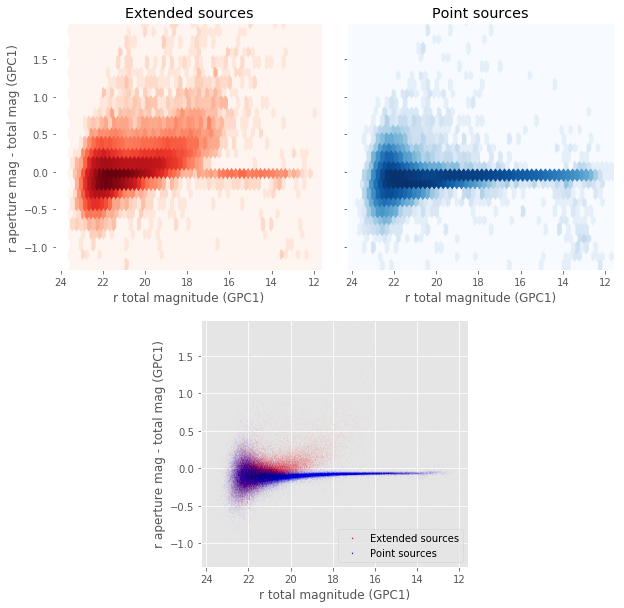

In [18]:
nb_ccplots(
    master_catalogue['m_gpc1_r'],
    master_catalogue['m_ap_gpc1_r'] - master_catalogue['m_gpc1_r'],
    "r total magnitude (GPC1)", "r aperture mag - total mag (GPC1)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 31244 / 977148 (3.20%)


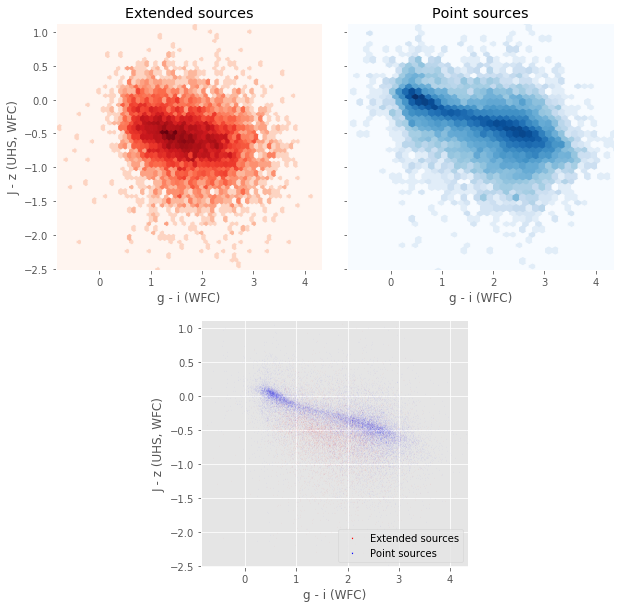

In [19]:
nb_ccplots(
    master_catalogue['m_wfc_g'] - master_catalogue['m_wfc_i'],
    master_catalogue['m_wfcam_j'] - master_catalogue['m_wfc_z'],
    "g - i (WFC)", "J - z (UHS, WFC)",
    master_catalogue["stellarity"]
)

Number of source used: 48841 / 977148 (5.00%)


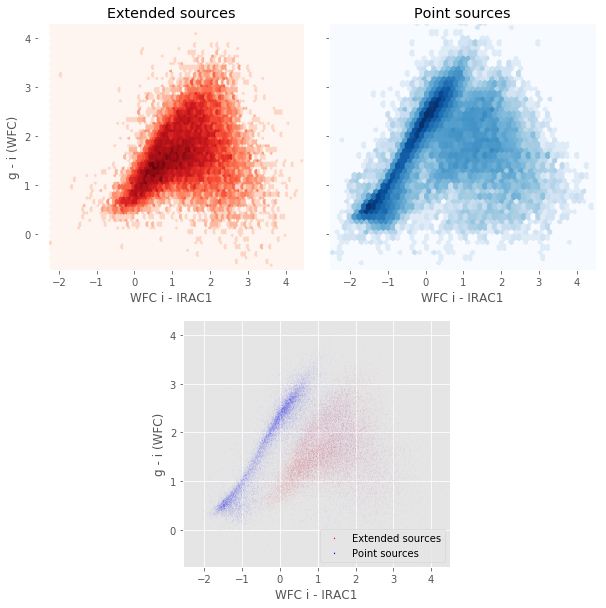

In [20]:
nb_ccplots(
    master_catalogue['m_wfc_i'] - master_catalogue['m_irac_i1'],
    master_catalogue['m_wfc_g'] - master_catalogue['m_wfc_i'],
    "WFC i - IRAC1", "g - i (WFC)",
    master_catalogue["stellarity"]
)

Number of source used: 93631 / 977148 (9.58%)


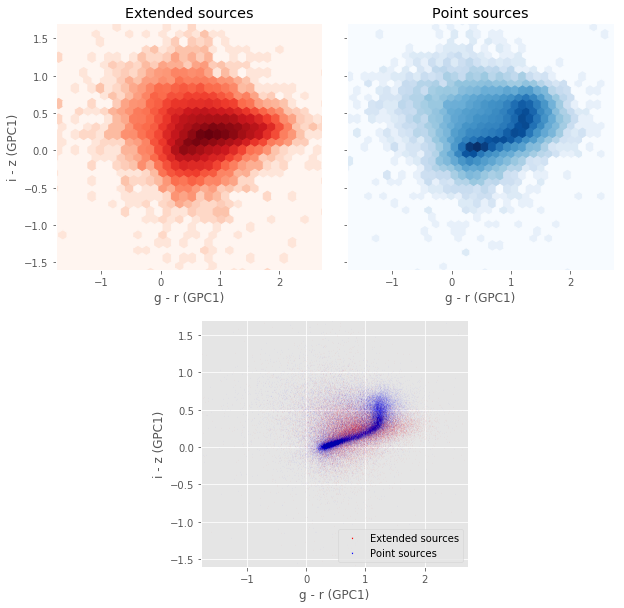

In [21]:
nb_ccplots(
    master_catalogue['m_gpc1_g'] - master_catalogue['m_gpc1_r'],
    master_catalogue['m_gpc1_i'] - master_catalogue['m_gpc1_z'],
    "g - r (GPC1)", "i - z (GPC1)",
    master_catalogue["stellarity"]
)

Number of source used: 17883 / 977148 (1.83%)


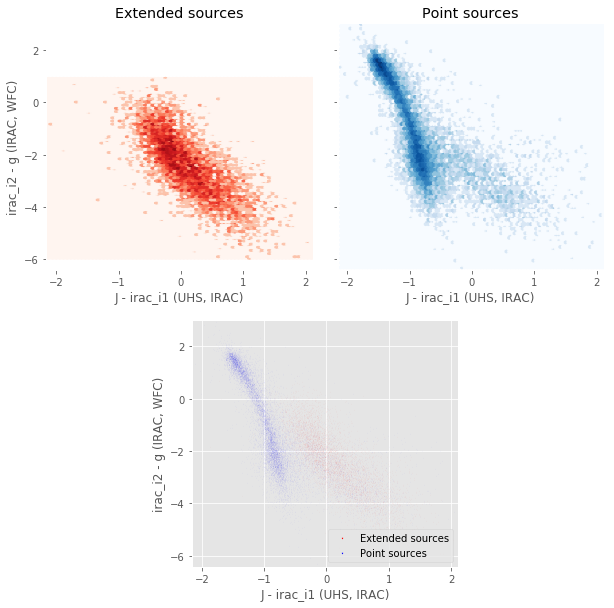

In [22]:
nb_ccplots(
    master_catalogue['m_wfcam_j'] - master_catalogue['m_irac_i1'],
    master_catalogue['m_irac_i2'] - master_catalogue['m_wfc_g'],
    "J - irac_i1 (UHS, IRAC)", "irac_i2 - g (IRAC, WFC)",
    master_catalogue["stellarity"]
)

Number of source used: 33231 / 977148 (3.40%)


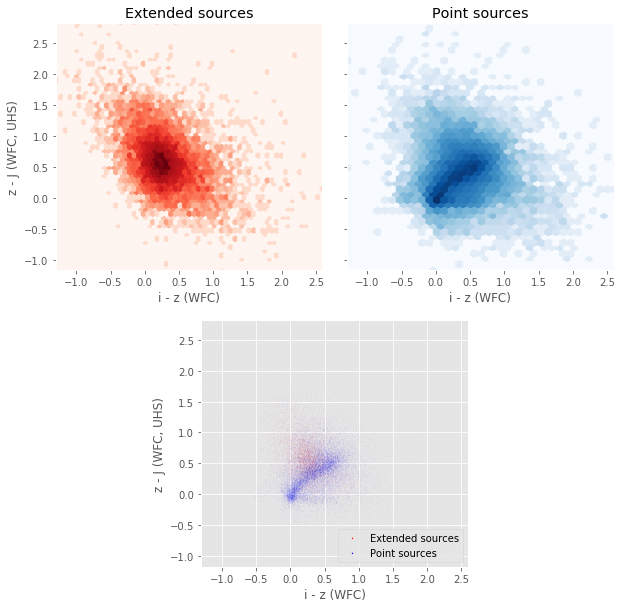

In [23]:
nb_ccplots(
    master_catalogue['m_wfc_i'] - master_catalogue['m_wfc_z'],
    master_catalogue['m_wfc_z'] - master_catalogue['m_wfcam_j'],
    "i - z (WFC)", "z - J (WFC, UHS)",
    master_catalogue["stellarity"]
)

Number of source used: 6493 / 977148 (0.66%)


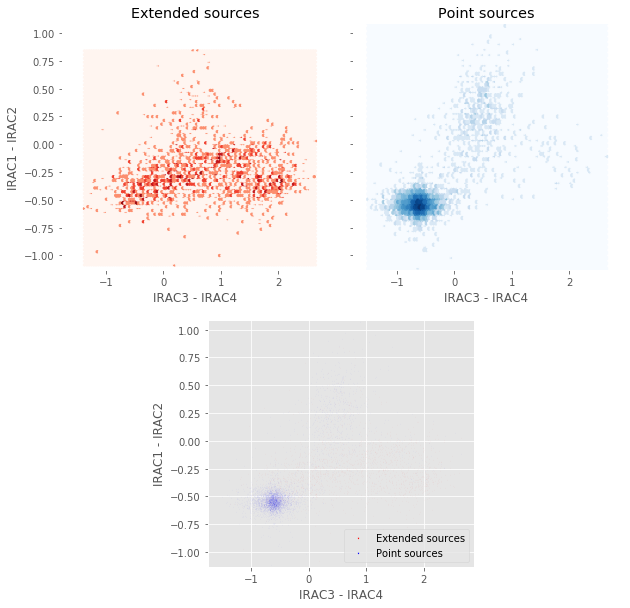

In [24]:
nb_ccplots(
    master_catalogue['m_irac_i3'] - master_catalogue['m_irac_i4'],
    master_catalogue['m_irac_i1'] - master_catalogue['m_irac_i2'],
    "IRAC3 - IRAC4", "IRAC1 - IRAC2",
    master_catalogue["stellarity"]
)